<a href="https://colab.research.google.com/github/Bhadanaji007/Machine_learning/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd



import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ML project/fake_or_real_news.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
news_dataset=pd.read_csv('/content/drive/MyDrive/ML project/fake_or_real_news.csv')
news_dataset.shape

(6335, 4)

In [ ]:
news_dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
news_dataset.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


In [ ]:
mapping = {'FAKE': 0, 'REAL': 1}
news_dataset=news_dataset.replace({'label': mapping})
news_dataset.head()

<ipython-input-8-6868beae750e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  news_dataset=news_dataset.replace({'label': mapping})


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [ ]:
news_dataset['content']= news_dataset['title']+' '+news_dataset['text']
print(news_dataset['content'])

0       You Can Smell Hillary’s Fear Daniel Greenfield...
1       Watch The Exact Moment Paul Ryan Committed Pol...
2       Kerry to go to Paris in gesture of sympathy U....
3       Bernie supporters on Twitter erupt in anger ag...
4       The Battle of New York: Why This Primary Matte...
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: content, Length: 6335, dtype: object


In [ ]:
X=news_dataset.drop(columns='label',axis=1)
Y=news_dataset['label']
print(X)
print(Y)

      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text  \
0     Daniel Greenfield, a Shillman Journalism Fello...   
1     Google Pinterest Digg L

In [ ]:
port_stem=PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content=re.sub('[^a-zA-z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [ ]:
news_dataset['content']=news_dataset['content'].apply(stemming)

In [ ]:
print(news_dataset['content'])

0       smell hillari fear daniel greenfield shillman ...
1       watch exact moment paul ryan commit polit suic...
2       kerri go pari gestur sympathi u secretari stat...
3       berni support twitter erupt anger dnc tri warn...
4       battl new york primari matter primari day new ...
                              ...                        
6330    state depart say find email clinton specialist...
6331    p pb stand plutocrat pentagon p pb stand pluto...
6332    anti trump protest tool oligarchi inform anti ...
6333    ethiopia obama seek progress peac secur east a...
6334    jeb bush suddenli attack trump matter jeb bush...
Name: content, Length: 6335, dtype: object


In [ ]:
X=news_dataset['content'].values
Y=news_dataset['label'].values

In [ ]:
vectorizer=TfidfVectorizer()
vectorizer.fit(X)
X=vectorizer.transform(X)

In [ ]:
print(X)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [ ]:
model=LogisticRegression()


In [ ]:
model.fit(X_train, Y_train)


LogisticRegression()

In [ ]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)


In [ ]:
print('Accuracy score of training data:',training_data_accuracy)

Accuracy score of training data: 0.9528413575374901


In [ ]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of test data:',test_data_accuracy)

Accuracy score of test data: 0.9139700078926598


In [ ]:
X_new=X_test[0]
prediction=model.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print('The news is Real')
else:
    print('The News is Fake')

[1]
The News is Fake


In [ ]:
print(Y_test[0])


1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
file_path_csv = "/content/drive/MyDrive/ML project/fake_or_real_news.csv"  # Replace with your dataset path
news_dataset = pd.read_csv(file_path_csv)

# Preprocessing
news_dataset['label'] = news_dataset['label'].replace({'FAKE': 0, 'REAL': 1})
news_dataset['content'] = news_dataset['title'] + " " + news_dataset['text']

X = news_dataset['content'].values
Y = news_dataset['label'].values

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# TF-IDF Vectorization for traditional ML models
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Initialize results storage
results = {}

def evaluate_model(model, X_test, Y_test, model_name):
    Y_pred = model.predict(X_test)
    # Convert probabilities to binary predictions for RNN and LSTM models
    if model_name in ["Recurrent NN", "LSTM"]:
        Y_pred = (Y_pred > 0.5).astype(int)  # Convert probabilities to 0 or 1 based on threshold
    if hasattr(model, "predict_proba"):
        Y_proba = model.predict_proba(X_test)[:, 1]
    else:
        Y_proba = Y_pred
    results[model_name] = {
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred),
        "Recall": recall_score(Y_test, Y_pred),
        "AUC": roc_auc_score(Y_test, Y_proba),
    }

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, Y_train)
evaluate_model(nb_model, X_test_tfidf, Y_test, "Naive Bayes")

# SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train_tfidf, Y_train)
evaluate_model(svm_model, X_test_tfidf, Y_test, "SVM")

# Feedforward Neural Network
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_tfidf, Y_train)
evaluate_model(mlp_model, X_test_tfidf, Y_test, "Feedforward NN")

# Tokenize and pad sequences for RNNs
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

# Recurrent Neural Network
rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    SimpleRNN(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_seq, Y_train, epochs=5, batch_size=32, verbose=1)
evaluate_model(rnn_model, X_test_seq, Y_test, "Recurrent NN")

# Long Short-Term Memory (LSTM)
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(128, activation='tanh'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_seq, Y_train, epochs=5, batch_size=32, verbose=1)
evaluate_model(lstm_model, X_test_seq, Y_test, "LSTM")

# Display results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()


<ipython-input-3-d2072541b98f>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  news_dataset['label'] = news_dataset['label'].replace({'FAKE': 0, 'REAL': 1})
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6118 - loss: 0.6404
Epoch 2/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8393 - loss: 0.4214
Epoch 3/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9133 - loss: 0.2232
Epoch 4/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9719 - loss: 0.0877
Epoch 5/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9884 - loss: 0.0487
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6986 - loss: 0.5719
Epoch 2/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9153 - loss: 0.2283
Epoch 3/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9575 - loss: 0.1252
Epoch 4/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9845 - loss: 0.0563
Epoch 5/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9903 - loss: 0.0356
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Results for Naive Bayes:
  Accuracy: 0.8958
  Precision: 0.8992
  Recall: 0.8936
  AUC: 0.9621

Results for SVM:
  Accuracy: 0.9353
  Precision: 0.9470
  Recall: 0.9233
  AUC: 0.9869

Results for Feedforward NN:
  Accuracy: 0.9361
  Precision: 0.9346
  Recall: 0.9390
  AUC: 0.9849

Results for Recurrent NN:
  Accuracy: 0.7522
  Precision: 0.6999
  Recall: 0.8905
  AUC: 0.7510

Results for LSTM:
  Accuracy: 0.8058
  Precision: 0.8478
  Recall: 0.7496
  AUC: 0.8063



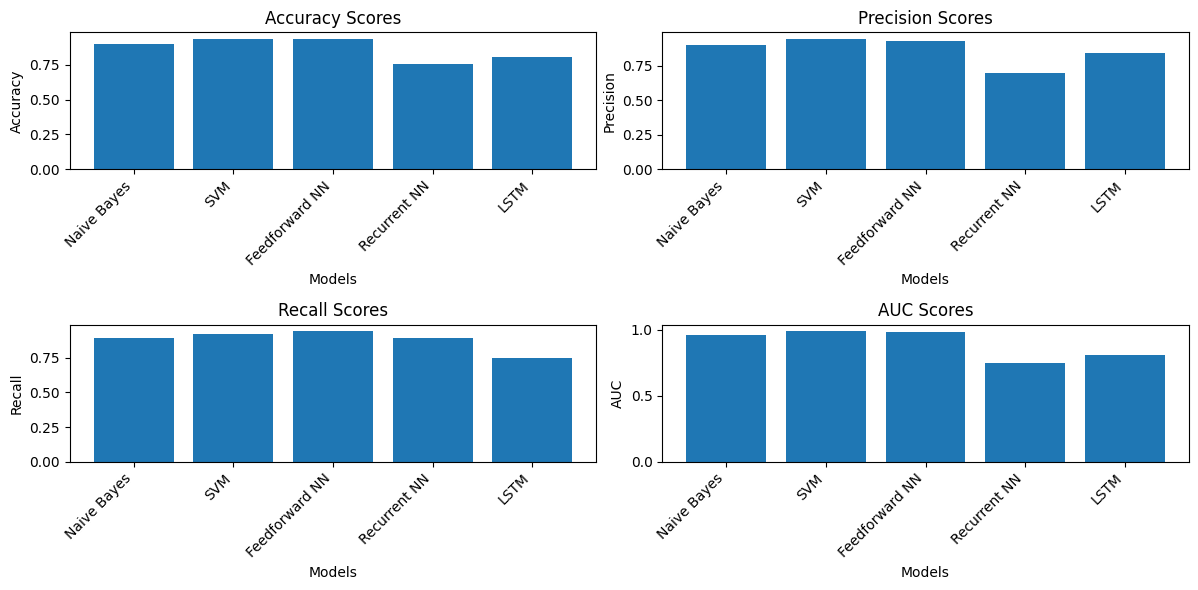

In [ ]:
# prompt: draw the bar graphs for the above result

import matplotlib.pyplot as plt

# Extract the metrics for plotting
model_names = list(results.keys())
accuracy_scores = [results[model]['Accuracy'] for model in model_names]
precision_scores = [results[model]['Precision'] for model in model_names]
recall_scores = [results[model]['Recall'] for model in model_names]
auc_scores = [results[model]['AUC'] for model in model_names]

# Create the bar plots
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(model_names, accuracy_scores)
plt.title('Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')

# Precision
plt.subplot(2, 2, 2)
plt.bar(model_names, precision_scores)
plt.title('Precision Scores')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.xticks(rotation=45, ha='right')

# Recall
plt.subplot(2, 2, 3)
plt.bar(model_names, recall_scores)
plt.title('Recall Scores')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')


# AUC
plt.subplot(2, 2, 4)
plt.bar(model_names, auc_scores)
plt.title('AUC Scores')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: create a table for result

import pandas as pd

# Assuming 'results' dictionary is already populated as in your provided code

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,Accuracy,Precision,Recall,AUC
Naive Bayes,0.895817,0.899213,0.893584,0.962053
SVM,0.935280,0.947030,0.923318,0.986887
Feedforward NN,0.936069,0.934579,0.938967,0.984949
Recurrent NN,0.752170,0.699877,0.890454,0.750959
LSTM,0.805841,0.847788,0.749609,0.806333


from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['AUC'].plot(kind='hist', bins=20, title='AUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Recall', y='AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['AUC'].plot(kind='line', figsize=(8, 4), title='AUC')
plt.gca().spines[['top', 'right']].set_visible(False)